# **Assignment 8**

# **Weeks 10 & 11 - matplotlib & seaborn**
* In this homework assignment, you will explore and analyze a public dataset of your choosing. Since this assignment is “open-ended” in nature, you are free to expand upon the requirements below. However, you must meet the minimum requirments as indicated in each section. 


* The preferred method for this analysis is in a .ipynb file. Feel free to use whichever platform of your choosing.  

### **Headings or comments**
**You are required to make use of comments, or headings for each section.  You must explain what your code is doing, and the results of running your code.**  Act as if you were giving this assignment to your manager - you must include clear and descriptive information for each section.


# Introduction

In this section, please describe the dataset you are using.  Include a link to the source of this data.  You should also provide some explanation on why you choose this dataset.

## 2018 Central Park Squirrel Census

This dataset is from the 2018 Central Park Squirrel Census, obtained from the NYC Open Data project.  To be completely straightforward, I just found the dataset to be hilarious and thought it would be fun to visualize publicly-sourced observations of squirrel behavior.  

Links:

* https://data.cityofnewyork.us/Environment/2018-Central-Park-Squirrel-Census-Squirrel-Data/vfnx-vebw
* https://www.thesquirrelcensus.com


______________
# Data Exploration
Import your dataset into your .ipynb, create dataframes, and explore your data.  

Include: 

* Summary statistics means, medians, quartiles, 
* Missing value information
* Any other relevant information about the dataset.  



In [93]:
# load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import skim

In [94]:
# suppress some Seaborn warnings
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [95]:
# load data
df = pd.read_csv('data/2018_squirrel_census.csv')

In [96]:
# 3023 observations in the dataset
print(len(df))

3023


In [97]:
# inspect some sample observations
df.head()

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9561344937861 40.7940823884086)
1,-73.968857,40.783783,21B-AM-1019-04,21B,AM,10192018,4,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9688574691102 40.7837825208444)
2,-73.974281,40.775534,11B-PM-1014-08,11B,PM,10142018,8,NaN,Gray,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.97428114848522 40.775533619083)
3,-73.959641,40.790313,32E-PM-1017-14,32E,PM,10172018,14,Adult,Gray,NaN,...,False,False,False,False,False,False,False,True,NaN,POINT (-73.9596413903948 40.7903128889029)
4,-73.970268,40.776213,13E-AM-1017-05,13E,AM,10172018,5,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9702676472613 40.7762126854894)


In [98]:
# Summary Statistics -- first let's handle our NAs and other problematic data points.

# Data Wrangling

Perform data wrangling.  You are free to use your best judgment here.  If you are stuck, look at previous assignment.

In [99]:
# clean up string formatting and values for Age, Highlight Fur Color and Combined Color
df['Age'].replace('?', 'Unknown', inplace=True)
df['Highlight Fur Color'] = df['Highlight Fur Color'].str.replace(', ', '-')
df['Combined_Color'] = df['Primary Fur Color'] + df['Highlight Fur Color'].apply(lambda x: '+' + x if pd.notnull(x) else '')

In [100]:
# clean up Location and Observed Height data where squirrels were heard but not seen.
df['Observed_Height'] = df['Above Ground Sighter Measurement']
df['Observed_Height'] = df['Observed_Height'].fillna(0)
df['Observed_Height'].replace('FALSE',0, inplace=True)
df['Observed_Height'] = df['Observed_Height'].astype(int)

df['Location'] = df['Location'].fillna('Unknown')
df.loc[df['Location'] == 'Unknown', 'Observed_Height'] = np.nan

In [101]:
# convert Date strings into date objects for visualization
df['Date'] = pd.to_datetime(df['Date'], format='%m%d%Y').dt.date

In [102]:
# drop these columns, we created new ones (Combined Color, Observed Height)
df = df.drop(['Combination of Primary and Highlight Color', 
              'Above Ground Sighter Measurement'], axis=1)

In [103]:
# examine summary statistics with a cleaner dataset
from skimpy import skim
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 3023   │ │ string      │ 13    │                                                          │
│ │ Number of columns │ 31     │ │ bool        │ 13    │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 3     │                                                          │
│                                │ object      │ 1     │                                                          │
│                                │ int64       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA  ┃ NA %   ┃ mean   ┃ sd       ┃ p0   ┃ p25  ┃ p50  ┃ p75  ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ X                         │   0 │      0 │    -74 │   0.0077 │  -74 │  -74 │  -74 │  -74 │   -74 │ ▅▇▇▅▆▂  │  │
│ │ Y                         │   0 │      0 │     41 │     0.01 │   41 │   41 │   41 │   41 │    41 │ ▇▇▆▂▆▅  │  │
│ │ Hectare Squirrel Number   │   0 │      0 │    4.1 │      3.1 │    1 │    2 │    3 │    6 │    23 │   ▇▃▁   │  │
│ │ Observed_Height           │  64 │   2.12 │    4.1 │       10 │    0 │    0 │    0 │    2 │   180 │    ▇    │  │
│ └───────────────────────────┴─────┴────────┴────────┴──────────┴──────┴──────┴──────┴──────┴───────┴─────────┘  │
│                                                      bool                                                       │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                            ┃ true           ┃ true rate                   ┃ hist               ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Running                                │            730 │                        0.24 │       ▇    ▃       │  │
│ │ Chasing                                │            279 │                       0.092 │       ▇    ▁       │  │
│ │ Climbing                               │            658 │                        0.22 │       ▇    ▂       │  │
│ │ Eating                                 │            760 │                        0.25 │       ▇    ▃       │  │
│ │ Foraging                               │           1435 │                        0.47 │       ▇    ▇       │  │
│ │ Kuks                                   │            102 │                       0.034 │         ▇          │  │
│ │ Quaas                                  │             50 │                       0.017 │         ▇          │  │
│ │ Moans                                  │              3 │                     0.00099 │         ▇          │  │
│ │ Tail flags                             │            155 │                       0.051 │         ▇          │  │
│ │ Tail twitches                          │            434 │                        0.14 │       ▇    ▁       │  │
│ │ Approaches                             │            

In [104]:
# observations per day
df.groupby('Date')['X'].count()

Date
2018-10-06    337
2018-10-07    405
2018-10-08    285
2018-10-10    335
2018-10-12    218
2018-10-13    434
2018-10-14    368
2018-10-17    216
2018-10-18    200
2018-10-19    158
2018-10-20     67
Name: X, dtype: int64

In [105]:
# avg observations per day
df.groupby('Date')['X'].count().mean()

274.8181818181818

# Visualizations

The main purpose of this assignment is to practice creating various visualizations using the matplotlib and seaborn library.

### **Part 1:**
Using matplotlib, create ***two or more plots*** that incorporate at least **5** of the following properties:

Note: these properties vary based on your data.  The goal is to practice creating visualizations and modifying its properties. 

*   Use and change a legend position
*   Change a legend font size
*   Place a legend outside of the plot
*   Create a single legend for all subplots
*   Change the title and x/y labels
*   Change the marker, line colors, and line width
*   Add annotations
*   Modify Axis Text Ticks/Labels
*   Change size of axis Labels
*   Your own choice not included above 


Plots that you can create **include**:

*   Scatter Plot
*   Bar plot
*   Line Chart
*   Multi Plots (e.g. using .subplot()
*   Histogram

You can add another plot not listed here if it works better for your data.  This is not a complete list of plots to create.

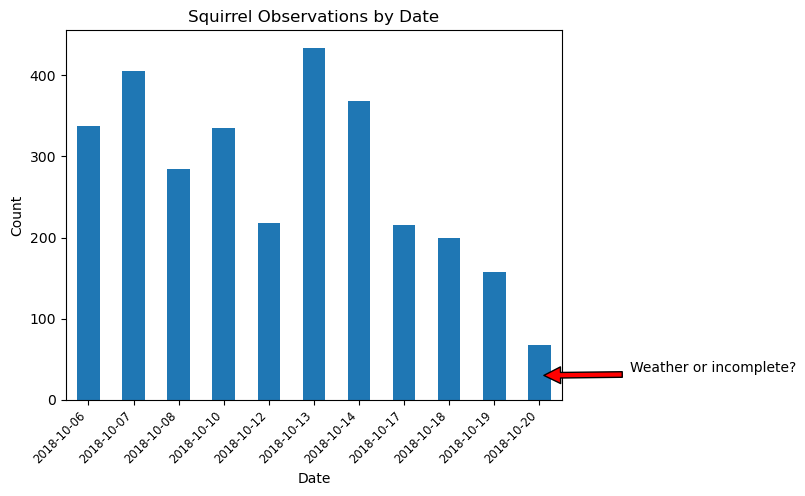

In [106]:
# A simple bar chart of observations per day  
ax = df['Date'].value_counts().sort_index().plot(kind='bar') 
plt.xlabel('Date') # x-axis label 'Date'
plt.ylabel('Count') # y-axis label 'Count'
plt.title('Squirrel Observations by Date') # plot title
plt.xticks(rotation=45, fontsize='small', ha='right') # rotate date labels for readability

# Add annotation to note a day with unusually few observations
ax.annotate('Weather or incomplete?', xy=(10, 30), xytext=(12, 35), 
            arrowprops=dict(facecolor='red', shrink=0.05))

plt.show() # display resulting plot

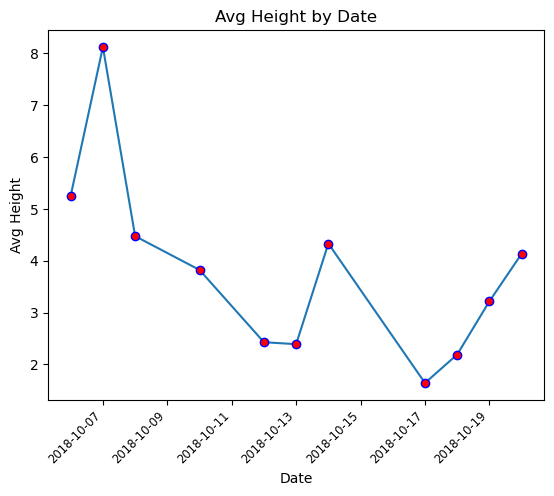

In [107]:
# A simple line plot of average squirrel observation heights by day (NAs omitted by default)
plt.plot(df.groupby('Date')['Observed_Height'].mean().sort_index(), marker='o', 
         markerfacecolor='red', markeredgecolor='blue')
plt.xlabel('Date') # x-axis label 'Date'
plt.ylabel('Avg Height') # y-axis label 'Avg Height'
plt.title('Avg Height by Date') # plot title
plt.xticks(rotation=45, fontsize='small', ha='right') # rotate date labels for readability
plt.show() # display resulting plot

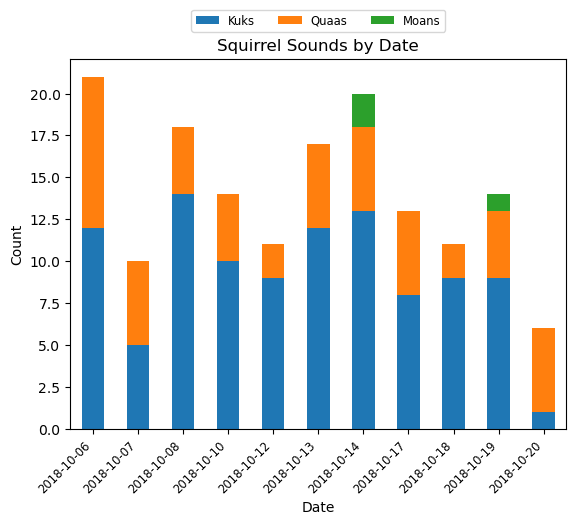

In [108]:
# A stacked bar chart of squirrel sounds, by day
df[['Kuks', 'Quaas', 'Moans']].groupby(df['Date']).sum().plot(kind='bar', stacked=True)
plt.xlabel('Date') # x-axis label 'Date'
plt.ylabel('Count') # y-axis label 'Count'
plt.title('Squirrel Sounds by Date') # plot title
plt.xticks(rotation=45, fontsize='small', ha='right') # rotate date labels for readability
plt.legend(['Kuks', 'Quaas', 'Moans'], loc='upper center', bbox_to_anchor=(0.5, 1.15), 
           fontsize='small', ncol=3) # move legend above plot area
plt.show() # display resulting plot

### **Part 2:**

Recreate the visualizations above using the Seaborn library as best as possible.  


**You are required to explain what each of your plots is representing. Plots without comments will not be accepted.**  In addition, please explain the properties you are showcasing.

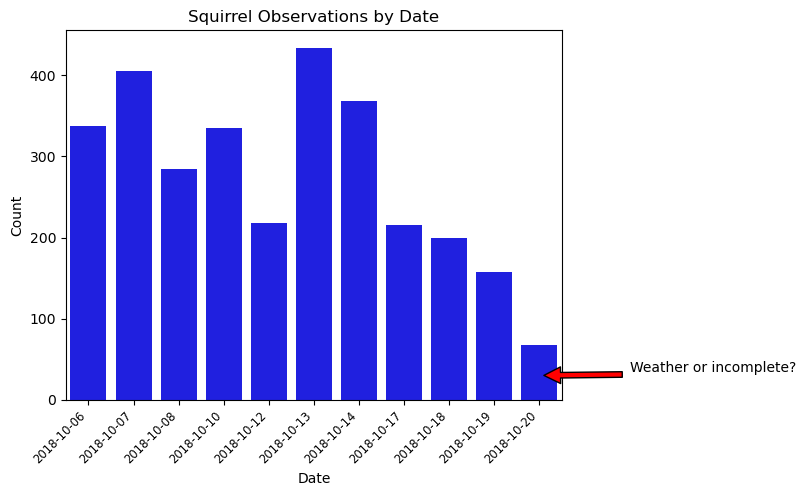

In [109]:
# A simple bar chart of observations per day  
counts = df['Date'].value_counts().reset_index().sort_values('Date') # table of obs per day
sns.barplot(x='Date', y='count', data=counts, color='blue') # seaborn bar chart
plt.xlabel('Date') # x-axis label 'Date'
plt.ylabel('Count') # y-axis label 'Count'
plt.title('Squirrel Observations by Date') # plot title
plt.xticks(rotation=45, fontsize='small', ha='right') # rotate date labels for readability

# Add annotation to note a day with unusually few observations
plt.annotate('Weather or incomplete?', xy=(10, 30), xytext=(12, 35), 
            arrowprops=dict(facecolor='red', shrink=0.05))

plt.show() # display resulting plot

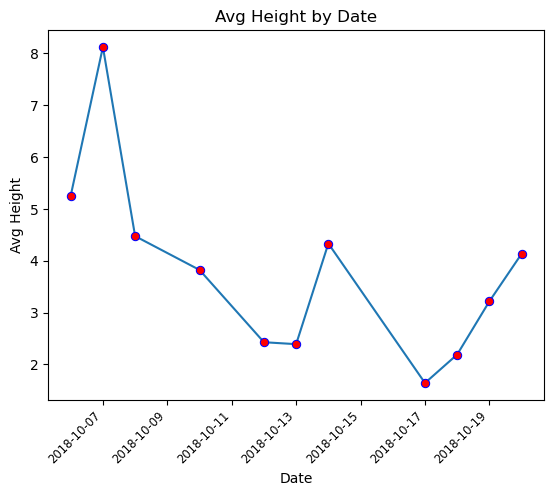

In [110]:
# A simple line plot of average squirrel observation heights by day
avg_height_by_date = df.groupby('Date')['Observed_Height'].mean().reset_index() # table avg height per day

sns.lineplot(x='Date', y='Observed_Height', data=avg_height_by_date, marker='o', 
             markerfacecolor='red', markeredgecolor='blue') # seaborn line chart

plt.xlabel('Date') # x-axis 'Date'
plt.ylabel('Avg Height') # y-axis 'Avg Height'
plt.title('Avg Height by Date') # plot title
plt.xticks(rotation=45, fontsize='small', ha='right') # rotate date labels
plt.show() # display resulting plot

/var/folders/xm/p3r132j94qxf68_z5kwjgd_r0000gn/T/ipykernel_24521/853838852.py:26: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(df_grp.columns, handles=legend_palette, loc='upper center', bbox_to_anchor=(0.5, 1.15),


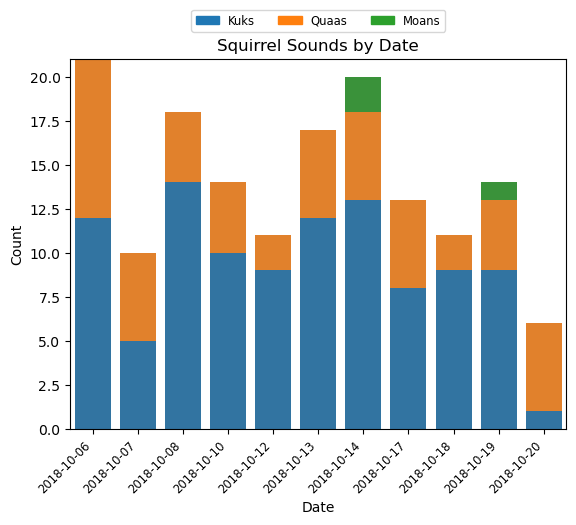

In [111]:
# A stacked bar chart of squirrel sounds, by day.  

# This is tougher in seaborn, which does not natively support this chart type.  Instead, we'll 
# stack three separate bar charts and impute the "starting point" for each based on the prior 
# value for that day. Also need to define a color palette using patches from matplotlib.

df_grp = df.groupby('Date')[['Kuks', 'Quaas', 'Moans']].sum() # counts of sounds by day

bottom = np.zeros_like(df_grp['Kuks']) # set a zero-array of starting values

# match palette to original colors in hex format
import matplotlib.patches as mpatches
palette = ['#1f77b4', '#ff7f0e', '#2ca02c']
legend_palette = [mpatches.Patch(color=palette[i], 
                                 label=df_grp.columns[i]) for i in range(len(df_grp.columns))]

# Create a bar chart for each level of the stack
for i, c in enumerate(df_grp.columns):
    sns.barplot(x=df_grp.index, y=df_grp[c], bottom=bottom, color=palette[i])
    bottom += df_grp[c]

plt.xlabel('Date') # x-label 'Date'
plt.ylabel('Count') # y-label 'Count'
plt.title('Squirrel Sounds by Date') # plot title
plt.xticks(rotation=45, fontsize='small', ha='right') # rotate date labels for readability
plt.legend(df_grp.columns, handles=legend_palette, loc='upper center', bbox_to_anchor=(0.5, 1.15), 
           fontsize='small', ncol=3) # move legend above plot area
plt.show() # display reuslting plot

### **Part 3:**
*In a comment or text box, explain the differences between creating a plot in matplotlib and seaborn, based on your above plots.*

Matplotlib seems most useful when making quick charts, since you can simply append .plot() in a single statement to a dataframe after applying any grouping or aggregation methods.   

Seaborn generally seems to require an intermediate step of creating the grouped/aggregated dataframe first, and then calling the appropriate chart function.  This is probably a more robust approach overall, but I was surprised to find that common charts such as the stacked-bar (above) are not natively supported.

# Conclusions  

After exploring your dataset, provide a short summary of what you noticed from this dataset.  

There were 3023 observations of squirrel activity in NYC's Central Park recorded in this dataset, covering a two-week period from Oct 06 to Oct 20, 2018.

On average there were about 275 squirrel observations per day, but the actual frequency varied greatly from as high as 405 to as low as 67. The lowest frequency observed occurred on the last day (Oct 20) which could suggest the possibility of an incomplete dataset due to error or some confounding variable.  For example, rain or other extreme weather might have kept the squirrels in the burrows that day -- or, NYC squirrel observers in their cozy apartments.  Either way, some additional investigation might be needed here!

Interestingly, the observed squirrel heights and sounds also seemed to vary greatly from day to day, which I found surprising.  While we might need to correct for sources of observational bias (such as number of observers and their attention to detail in the field), it could be interesting to map other datasets such as weather patterns (wind speeds, temperature) or city noise levels to identify any correlations with squirrel height and activity.